In [ ]:
"""Often it is more straight forward to analyze data in a jupyter notebook than in an over-engineered python application. Hence, for training purposes, do the following analysis on air quality data given in airquality.csv in a jupyter notebook:
1. Create a new jupyter notebook in PyCharm. done
2. Import numpy and pandas and load the airquality.csv file into a data.frame.done
3. Calculate some statistics of the temperature values. Report them as text in the jupyter notebook. done
4. Find outlier (one) and correct it by averaging the values before and after the outlier. Make a note to the report.done
5. Plot the temperature series with matplotlib or seaborn and add it to the report.done
6. Create a temperature converter function from °F to °C (formula: °F = °C × (9/5) + 32).
7. Convert all temperature values from °F to °C using map().
8. Plot both temperature graphs in one figure and add it to the report.
9. Declare a class “AirQualityReport” comprising object variables that store the mean values of columns where reasonable. 10. Add a object method to the class that calculate the max value of all object variables. The function should return a
dictionary containing the original column name of the variable with the max value and the maximum value itself. 11.Export the report to an HTML and/or a PDF document.
12.Explore Pandas, Numpy and matplotlib functionalities in more detail."""

In [3]:
import numpy as np
import pandas as pd
dataset= pd.read_csv("airquality.csv")



In [4]:
print(dir(pd))
print(dir(pd.DataFrame))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [5]:
dataset.head()
dataset.describe()
print(dataset.columns)

Index(['rownames', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


In [6]:
###3. Calculate some statistics of the temperature values. Report them as text in the jupyter notebook. done
dataset["Temp"]
dataset["Temp"].describe()
dataset["Temp"].count()
print(f"the total counts of values is {dataset["Temp"].count()}")
print(dataset["Temp"].max())
print(f"the maximum value of Temperature here is {dataset["Temp"].max()}")
dataset["Temp"].sum()
print(f"the sum of Temperature here is {dataset["Temp"].sum()}")


the total counts of values is 153
97.0
the maximum value of Temperature here is 97.0
the sum of Temperature here is 11647.0


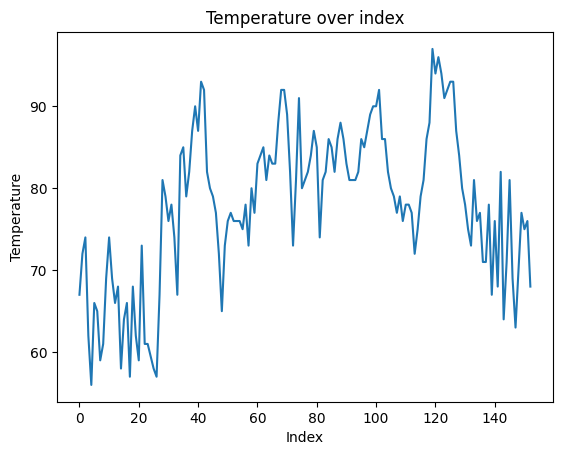

    rownames  Ozone  Solar.R  Wind  Temp  Month   Day
4        5.0    NaN      NaN  14.3  56.0    5.0   5.0
7        8.0   19.0     99.0  13.8  59.0    5.0   8.0
14      15.0   18.0     65.0  13.2  58.0    5.0  15.0
17      18.0    6.0     78.0  18.4  57.0    5.0  18.0
20      21.0    1.0      8.0   9.7  59.0    5.0  21.0
25      26.0    NaN    266.0  14.9  58.0    5.0  26.0
26      27.0    NaN      NaN   8.0  57.0    5.0  27.0
Outlier at index 4 corrected by averaging 62.0 and 66.0 to 64.0.


In [13]:
### Find outlier (one) and correct it by averaging the values before and after the outlier. Make a note to the report.
# Step 1: Quick look at possible outliers
import matplotlib.pyplot as plt
plt.plot(dataset["Temp"].values)
plt.title("Temperature over index")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.show()

# Step 2: Find the outlier using statistics (optional, but more automated)
mean_temp = dataset["Temp"].mean()
std_temp = dataset["Temp"].std()
print(mean_temp)
print(std_temp)

# Assume outlier if it's beyond 3 standard deviations
outliers = dataset[(dataset["Temp"] > mean_temp + 3*std_temp) | (dataset["Temp"] < mean_temp - 2*std_temp)]
print(outliers)

# Step 3: Choose one outlier to fix
# Suppose you find an outlier at index `i`
i = outliers.index[0]  # picking the first outlier

# Step 4: Correct the outlier
# Average the temperature before and after
prev_temp = dataset.loc[i - 1, "Temp"]
next_temp = dataset.loc[i + 1, "Temp"]
new_temp = (prev_temp + next_temp) / 2

# Update the dataset
dataset.loc[i, "Temp"] = new_temp

print(f"Outlier at index {i} corrected by averaging {prev_temp} and {next_temp} to {new_temp}.")

In [ ]:
###5. Plot the temperature series with matplotlib or seaborn and add it to the report.
plt.plot(dataset["Temp"])###plot1

plt.boxplot(dataset["Temp"].dropna())###plot2 if column has NaN values, you might want to drop
print(dataset["Temp"].dtype)###checking data type
print(dataset["Temp"].isna().sum())  ### how many NaN values
print(dataset["Temp"].shape)         ### how many entries
print(dataset["Temp"].unique())###checking unique values

plt.boxplot(dataset["Temp"])
plt.show()

###gpt upgraded plot using matplotlib
plt.figure(figsize=(10, 6))  # bigger figure
plt.plot(dataset["Temp"], linewidth=2)  # thicker line
plt.title("Temperature Over Time", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # add light dashed grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # fit nicely
plt.show()

In [34]:
###6. Create a temperature converter function from °F to °C (formula: °F = °C × (9/5) + 32)
def converter(temperature):
        try:
            float(temperature)==True
        except:
            print("wrong input, please try again.")
        temperature_C=(temperature-32)/(9/5)
        return temperature_F


for temperature in dataset["Temp"].dropna():
    print(f'the converted temperature from °F to °C  is {converter(temperature)}')


###chatgpt corrected and 7. Convert all temperature values from °F to °C using map().
def converter(temperature):
    try:
        temperature = float(temperature)
        temperature_C = (temperature - 32) * 5/9
        return temperature_C
    except ValueError:
        print("Wrong input, please try again.")
        return None

# Apply to dataset
dataset["Temp_C"] = dataset["Temp"].map(converter)

# Check the result
print(dataset[["Temp", "Temp_C"]].head())





SyntaxError: unterminated f-string literal (detected at line 12) (3004622848.py, line 12)

In [ ]:
###8. Plot both temperature graphs in one figure and add it to the report.
plt.figure(figsize=(12, 6))###width 12 inch
# Plot Fahrenheit
plt.plot(dataset.index, dataset["Temp"], label="Temperature (°F)", linewidth=2)
# Plot Celsius
plt.plot(dataset.index, dataset["Temp_C"], label="Temperature (°C)", linewidth=2)

plt.title("Temperature Over Time (°F and °C)", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)  # show which line is which
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




In [76]:
###9. Declare a class “AirQualityReport” comprising object variables that store the mean values of columns where reasonable.
class AirQualityReport:
    def __init__(self, dataset):
        # Save dataset inside the object (optional but useful)
        self.dataset = dataset# <-- object variable
        # Calculate mean values for reasonable columns
        self.mean_temp_F = dataset["Temp"].mean()# <-- object variable

        if "Temp_C" in dataset.columns:
            self.mean_temp_C = dataset["Temp_C"].mean()# <-- object variable

        # Add other columns if needed (example for humidity, etc.)
        # self.mean_humidity = dataset["Humidity"].mean()

    def show_report(self):
        print(f"Average Temperature (°F): {self.mean_temp_F:.2f}")

        if hasattr(self, 'mean_temp_C'):
            print(f"Average Temperature (°C): {self.mean_temp_C:.2f}")
    def max_value(self):
        max_value_column = self.dataset.max()
        result = {}
        for k, v in max_value_column.items():
            print(f'colname is {k}, max value is {v}')
            result[k] = v
        return result

"""above 10. Add a object method to the class that calculate the max value of all object variables. The function should return a dictionary containing the original column name of the variable with the max value and the maximum value itself."""



report = AirQualityReport(dataset)# <-- the object: report
report.show_report()
report.max_value()
print(report.max_value())


Average Temperature (°F): 77.95
Average Temperature (°C): 25.53
colname is rownames, max value is 153.0
colname is Ozone, max value is 168.0
colname is Solar.R, max value is 334.0
colname is Wind, max value is 20.7
colname is Temp, max value is 97.0
colname is Month, max value is 9.0
colname is Day, max value is 31.0
colname is Temp_C, max value is 36.111111111111114
colname is rownames, max value is 153.0
colname is Ozone, max value is 168.0
colname is Solar.R, max value is 334.0
colname is Wind, max value is 20.7
colname is Temp, max value is 97.0
colname is Month, max value is 9.0
colname is Day, max value is 31.0
colname is Temp_C, max value is 36.111111111111114
{'rownames': 153.0, 'Ozone': 168.0, 'Solar.R': 334.0, 'Wind': 20.7, 'Temp': 97.0, 'Month': 9.0, 'Day': 31.0, 'Temp_C': 36.111111111111114}


AttributeError: 'AirQualityReport' object has no attribute 'export_report'

In [79]:
###11.Export the report to an HTML and/or a PDF document.
# Install first if you don't have it:
# pip install reportlab

from reportlab.pdfgen import canvas
# Create a PDF file
pdf_file = "air_quality_report.pdf"
c = canvas.Canvas(pdf_file)
# Add title
c.setFont("Helvetica-Bold", 16)
c.drawString(100, 800, "Air Quality Report")
# Add report lines
c.setFont("Helvetica", 12)
c.drawString(100, 770, "Average Temperature (°F): 72.34")
c.drawString(100, 750, "Average Temperature (°C): 22.41")
c.drawString(100, 730, "Max Object Variable: Temp_C = 22.41")
# Save the PDF
c.save()

print(f"PDF report saved as {pdf_file}")
import os
# Name of your PDF file
filename = "air_quality_report.pdf"
# Open the PDF on macOS
os.system(f"open '{filename}'")



AttributeError: 'AirQualityReport' object has no attribute 'export_report'

In [ ]:
###12.Explore Pandas, Numpy and matplotlib functionalities in more detail.